# DATA SCIENCE & AI (FIAP MBA) - Sabrina Otoni da Silva - 2023

## Projeto nº 4
### Professor: Ahirton Lopes (Machine Learning: Aula 3) -- https://github.com/ahirtonlopes/Mastering-Machine-Learning

#### Esse notebook concetra-se exclusivamente no estudo de formas de divisão, amostragem e validação de datasets.

Ref. https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html


In [1]:
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, KFold, LeaveOneOut
from sklearn import metrics
from matplotlib import pyplot as plt

In [2]:
columns = 'age sex bmi map tc ldl hdl tch ltg glu'.split()
diabetes = datasets.load_diabetes()
df = pd.DataFrame(diabetes.data, columns=columns)
y = diabetes.target

In [3]:
df.shape

(442, 10)

## Holdout

In [4]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2) #Princípio de Pareto
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


In [5]:
#Model fitting
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

In [6]:
predictions[0:5]

array([111.57999116, 100.07041951,  59.51585229, 162.05690782,
        89.39249067])

Text(0, 0.5, 'Predições')

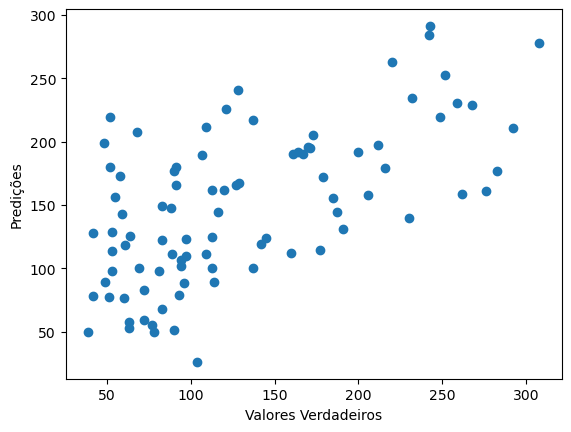

In [7]:
plt.scatter(y_test, predictions)
plt.xlabel('Valores Verdadeiros')
plt.ylabel('Predições')

In [8]:
rmse = metrics.mean_squared_error(y_test, predictions, squared=False)
print(f'RMSE: {rmse}')

RMSE: 60.85018708097184


## Cross Validation, K-Folds e Leave One Out

Documentações e referências utilizadas:

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.LeaveOneOut.html

https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

In [9]:
def evaluate_model_LR(cv):

  model = linear_model.LinearRegression()

  r2 = cross_val_score(model, df, y, cv=cv, scoring='r2')

  return r2

In [10]:
for k in range(2,11):
  cv = KFold(n_splits=k, shuffle=True)
  print(f'-> folds={k}, ', evaluate_model_LR(cv))

-> folds=2,  [0.52856325 0.45901831]
-> folds=3,  [0.42757545 0.5499977  0.50770607]
-> folds=4,  [0.50108281 0.46939609 0.51221332 0.48901761]
-> folds=5,  [0.39725644 0.6095144  0.4413643  0.50050064 0.45937329]
-> folds=6,  [0.52992511 0.40610074 0.34085999 0.57545598 0.54977362 0.52743836]
-> folds=7,  [0.46693145 0.5380225  0.63977172 0.48666932 0.32422154 0.430309
 0.42377999]
-> folds=8,  [0.44986343 0.61417586 0.47520304 0.52652289 0.53769864 0.57944746
 0.40021094 0.29524911]
-> folds=9,  [0.51571679 0.55802508 0.27561523 0.4868761  0.4557738  0.41574839
 0.38376882 0.62703908 0.49243426]
-> folds=10,  [0.5781414  0.36947518 0.46631267 0.57971693 0.5956634  0.52406216
 0.46647354 0.60828336 0.41053018 0.22262659]


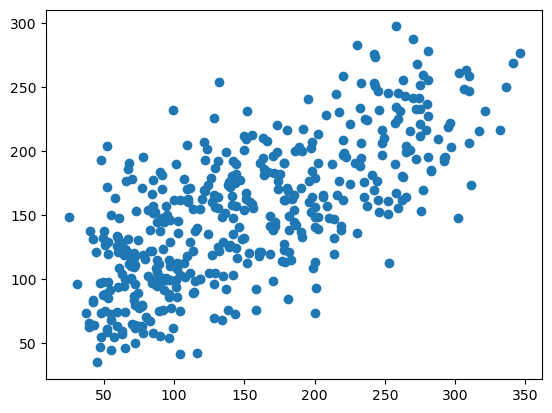

In [11]:
cv_prediction_LR = cross_val_predict(linear_model.LinearRegression(), df, y, cv=4)
plt.scatter(y, cv_prediction_LR)

Podemos ver que nosso plot é bem diferente do anterior. São quatro vezes mais pontos que o gráfico original, pois usamos cv = 4.


In [12]:
rmse = metrics.mean_squared_error(y, cv_prediction_LR, squared=False)
print(f'RMSE: {rmse}')

RMSE: 54.42436170402235


In [13]:
cv = LeaveOneOut()
model = linear_model.LinearRegression()
predict = cross_val_predict(linear_model.LinearRegression(), df, y, cv=cv)

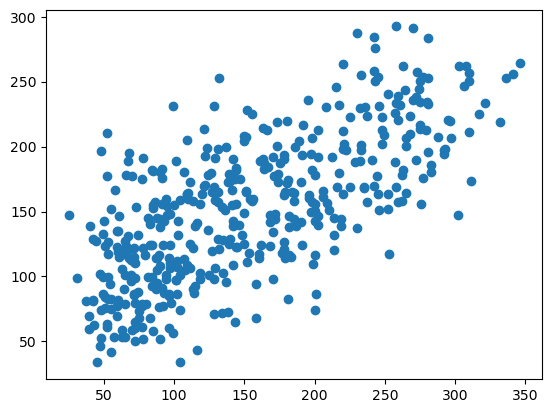

In [14]:
plt.scatter(y, predict)

In [15]:
rmse = metrics.mean_squared_error(y, predict, squared=False)
print(f'RMSE: {rmse}')

RMSE: 54.7882546445808
